### Compare Stochastic Gradient Descent and Adam Optimizer

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import math as math
import matplotlib.animation as animation

### Generating the data

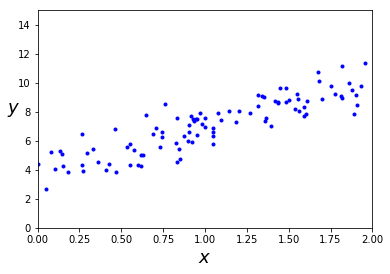

In [2]:
#given the data with theta0 is 4 and theta1 is 3
np.random.seed(7)
X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)
plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,15])

## Anlytical of linear regression

In [3]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[3.84626494]
 [3.15105198]]


In [4]:
# plot the result of theoretical data

In [5]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.84626494],
       [10.1483689 ]])

[0, 2, 0, 15]

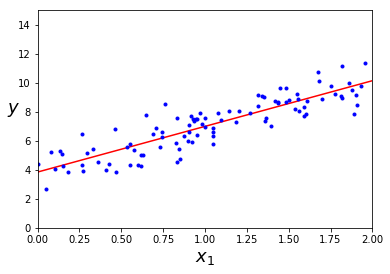

In [6]:
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])

In [7]:
def  cal_cost(theta,X,y):
    '''   
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))   
    where:
        j is the no of features
    ''' 
    m = len(y)    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost


## Stocashtic gradient descent

In [8]:
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
            
        cost_history[it]  = cost
        
    return theta, cost_history

In [9]:
random.seed(123)
lr =0.05
n_iter = 50
theta = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter)
print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          4.049,
Theta1:          2.965
Final cost/MSE:  39.472


## Adam

In [10]:
def adam_descent(X,y,theta,learning_rate=0.01,iterations=50,lr=1e-5, b1=0.9, b2=0.999, epsilon=1e-4):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    Returns the final theta vector and array of cost history over no of iterations
    '''
    
    m_t = np.zeros((2,1))
    v_t = np.zeros((2,1))
    m = len(y)
    t = 0
    cost_history = np.zeros(iterations)
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            t+=1
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)
            gradient = X_i.T.dot((prediction - y_i))*(1/m)
            m_t = b1*m_t + (1-b1)*gradient
            v_t = b2*v_t + (1-b2)*(gradient**2)
            m_cap = m_t/(1-(b1**t))
            v_cap = v_t/(1-(b2**t))
            theta = theta - (learning_rate*m_cap)/(v_cap**0.5+epsilon)
            cost += cal_cost(theta,X_i,y_i)
            
        cost_history[it]  = cost
        
    return theta, cost_history

In [11]:
random.seed(123)
theta = np.random.randn(2,1)
theta, error = adam_descent(X_b, y,theta)
print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          3.864,
Theta1:          3.158
Final cost/MSE:  39.472


## Plot and Compare the result

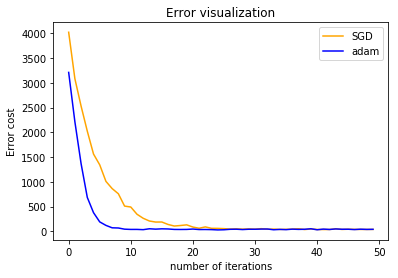

In [12]:
error_subplot = plt.subplot()
error_subplot.set_title("Error visualization")
error_subplot.plot(range(n_iter),cost_history, color="orange", label="SGD")
error_subplot.plot(range(n_iter),error, color="blue", label="adam")
plt.xlabel("number of iterations")
plt.ylabel("Error cost")
plt.legend()

From the plot, we can see that Adam converge faster than SGD.